### İsmail Tunç 150200306

### Generating Data Sets D1 and D2 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Seed for reproducibility
np.random.seed(42)

# linearly separable data (D1)
D1_class1 = np.random.randn(100, 2) + np.array([2, 2])
D1_class2 = np.random.randn(100, 2) + np.array([-2, -2])
D1_data = np.vstack((D1_class1, D1_class2))
D1_labels = np.hstack((np.ones(100), -np.ones(100)))

# linearly non-separable data (D2)
D2_class1 = np.random.randn(100, 2) + np.array([1, 1])
D2_class2 = np.random.randn(100, 2) + np.array([-1, -1])
D2_class2[:50] += 2  # to add some overlap
D2_data = np.vstack((D2_class1, D2_class2))
D2_labels = np.hstack((np.ones(100), -np.ones(100)))


### Question 4: Plotting the data points in D1 and in D2

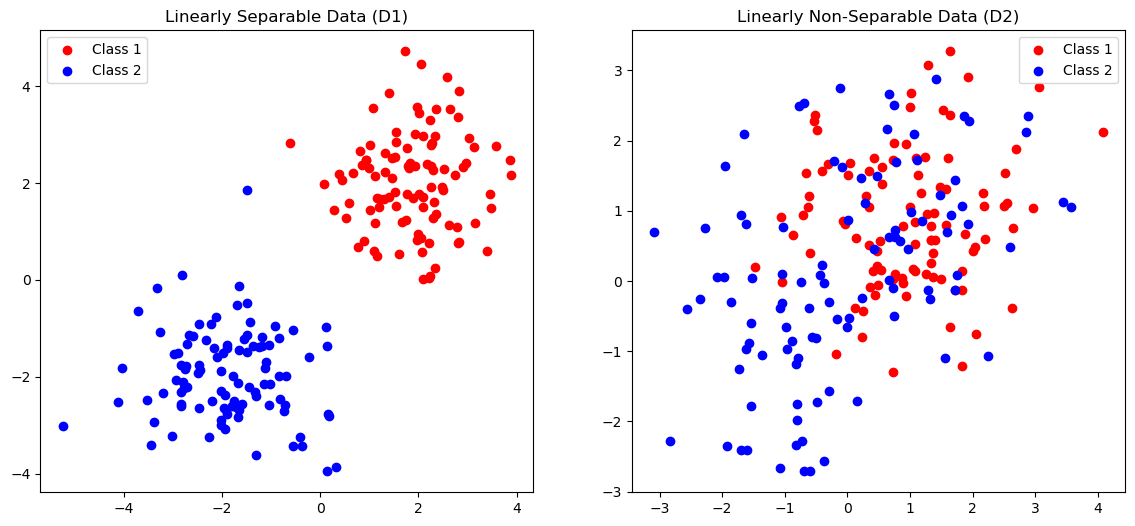

In [2]:
# D1
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(D1_class1[:, 0], D1_class1[:, 1], color='r', label='Class 1')
plt.scatter(D1_class2[:, 0], D1_class2[:, 1], color='b', label='Class 2')
plt.title('Linearly Separable Data (D1)')
plt.legend()

# D2
plt.subplot(1, 2, 2)
plt.scatter(D2_class1[:, 0], D2_class1[:, 1], color='r', label='Class 1')
plt.scatter(D2_class2[:, 0], D2_class2[:, 1], color='b', label='Class 2')
plt.title('Linearly Non-Separable Data (D2)')
plt.legend()
plt.show()

### Splitting Data into Training and Test Sets and taking T1 and T2

#### Randomly selecting 10 vectors(test_size=0.1) from each class for the test sets T1 and T2

In [3]:
# splitting D1 into training and test sets
D1_train_data, D1_test_data, D1_train_labels, D1_test_labels = train_test_split(D1_data, D1_labels, test_size=0.1, stratify=D1_labels)

# splitting D2 into training and test sets
D2_train_data, D2_test_data, D2_train_labels, D2_test_labels = train_test_split(D2_data, D2_labels, test_size=0.1, stratify=D2_labels)


In [4]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

### Question 5: Implementation and Evaluation of Hard-Margin SVM

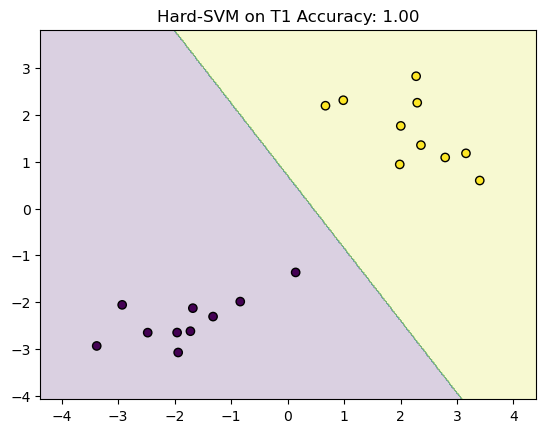

In [21]:
# hard-margin SVM for D1
hard_svm = SVC(kernel='linear', C=10**10)
hard_svm.fit(D1_train_data, D1_train_labels)

# evaluation on T1
D1_test_pred = hard_svm.predict(D1_test_data)
D1_test_accuracy = accuracy_score(D1_test_labels, D1_test_pred)


plot_decision_boundary(hard_svm, D1_test_data, D1_test_labels, f'Hard-SVM on T1 Accuracy: {D1_test_accuracy:.2f}')

*Comment: It is simple and easy to separate because of the distribution of the data points. It's linearly separable.*

### Question 6: Implementation and Evaluation of Soft-Margin SVM

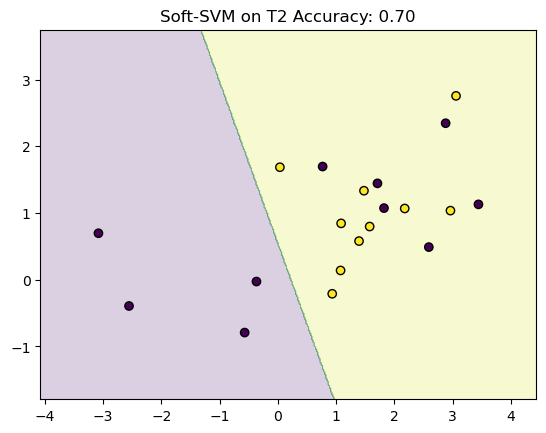

In [16]:
# soft-margin SVM for D2
soft_svm = SVC(kernel='linear', C=1.0)
soft_svm.fit(D2_train_data, D2_train_labels)

# evaluation on T2
D2_test_pred = soft_svm.predict(D2_test_data)
D2_test_accuracy = accuracy_score(D2_test_labels, D2_test_pred)
a
plot_decision_boundary(soft_svm, D2_test_data, D2_test_labels, f'Soft-SVM on T2 Accuracy: {D2_test_accuracy:.2f}')

*Comment: It is not as simple as linearly separable one because of the distribution of the data points. I used C=1 for soft-margin.*

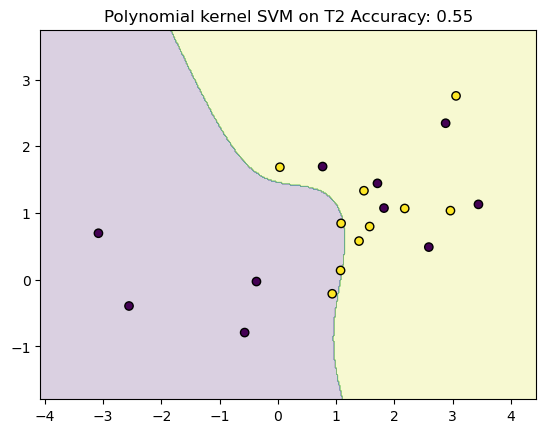

In [17]:
# soft-margin SVM with Polynomial kernel for D2
poly_svm = SVC(kernel='poly', degree=3, C=1.0)
poly_svm.fit(D2_train_data, D2_train_labels)

# evaluation on T2
D2_test_pred_poly = poly_svm.predict(D2_test_data)
D2_test_accuracy_poly = accuracy_score(D2_test_labels, D2_test_pred_poly)

plot_decision_boundary(poly_svm, D2_test_data, D2_test_labels, f'Polynomial kernel SVM on T2 Accuracy: {D2_test_accuracy_poly:.2f}')

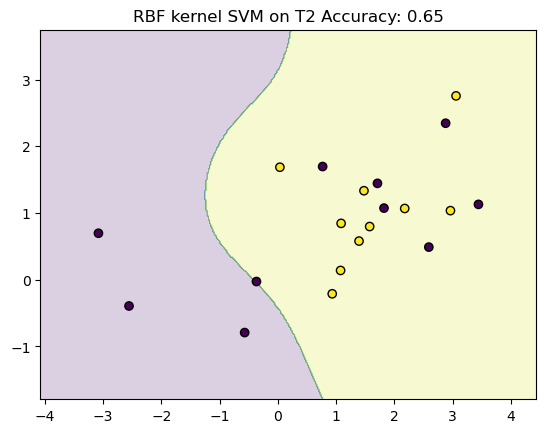

In [18]:
# soft-margin SVM with RBF kernel for D2
rbf_svm = SVC(kernel='rbf', C=1.0)
rbf_svm.fit(D2_train_data, D2_train_labels)

# evaluation on T2
D2_test_pred_rbf = rbf_svm.predict(D2_test_data)
D2_test_accuracy_rbf = accuracy_score(D2_test_labels, D2_test_pred_rbf)

plot_decision_boundary(rbf_svm, D2_test_data, D2_test_labels, f'RBF kernel SVM on T2 Accuracy: {D2_test_accuracy_rbf:.2f}')

### Question 7: Implementation and Evaluation of a Two-Layer MLP

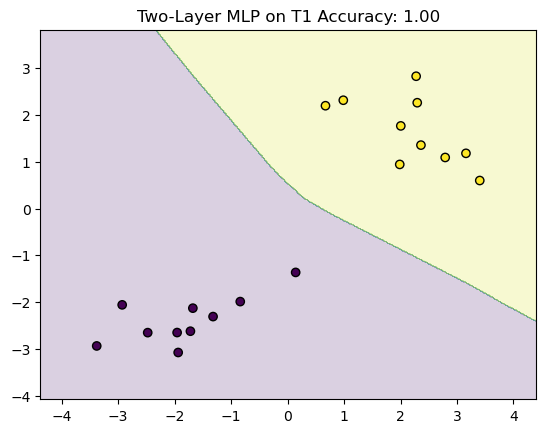

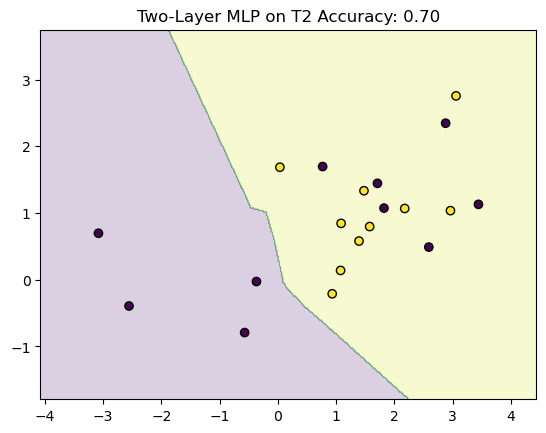

In [25]:
# two-layer MLP for D1
mlp_D1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp_D1.fit(D1_train_data, D1_train_labels)

# evaluation on T1
D1_mlp_test_pred = mlp_D1.predict(D1_test_data)
D1_mlp_test_accuracy = accuracy_score(D1_test_labels, D1_mlp_test_pred)

# two-layer MLP for D2
mlp_D2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp_D2.fit(D2_train_data, D2_train_labels)

# evaluation on T2
D2_mlp_test_pred = mlp_D2.predict(D2_test_data)
D2_mlp_test_accuracy = accuracy_score(D2_test_labels, D2_mlp_test_pred)

plot_decision_boundary(mlp_D1, D1_test_data, D1_test_labels, f'Two-Layer MLP on T1 Accuracy: {D1_mlp_test_accuracy:.2f}')
plot_decision_boundary(mlp_D2, D2_test_data, D2_test_labels, f'Two-Layer MLP on T2 Accuracy: {D2_mlp_test_accuracy:.2f}')

### Summary and Comparison

In [26]:
print(f"Hard-margin SVM Test Accuracy on T1: {D1_test_accuracy:.2f}")
print(f"Soft-margin SVM Test Accuracy on T2(linear): {D2_test_accuracy:.2f}")
print(f"Soft-margin SVM Test Accuracy on T2(Polynomial): {D2_test_accuracy_poly:.2f}")
print(f"Soft-margin SVM Test Accuracy on T2(RBF): {D2_test_accuracy_rbf:.2f}")
print(f"MLP Test Accuracy on T1: {D1_mlp_test_accuracy:.2f}")
print(f"MLP Test Accuracy on T2: {D2_mlp_test_accuracy:.2f}")


Hard-margin SVM Test Accuracy on T1: 1.00
Soft-margin SVM Test Accuracy on T2(linear): 0.70
Soft-margin SVM Test Accuracy on T2(Polynomial): 0.55
Soft-margin SVM Test Accuracy on T2(RBF): 0.65
MLP Test Accuracy on T1: 1.00
MLP Test Accuracy on T2: 0.70
